In [1]:
import pandas as pd
import numpy as np
import torch
import streamlit
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def world_map(resources, df2):
    datasets = []
    for link in resources:
        df = pd.read_csv(link)
        df = df[df['Country/Region'] != 'Diamond Princess']
        df = df[df['Country/Region'] != 'MS Zaandam']
        df = df.drop(['Province/State'], axis=1)
        df = df.reset_index(drop=True)
        df = df.groupby('Country/Region').sum()
        df = df.reset_index()
        df.loc[df.loc[df['Country/Region']=='US'].index, 'Country/Region']= 'United States of America'
        df.loc[df.loc[df['Country/Region']=='United Kingdom'].index, 'Country/Region']= 'United Kingdom of Great Britain and Northern Ireland'
        df.loc[df.loc[df['Country/Region']=='Russia'].index, 'Country/Region']= 'Russian Federation'
        df.loc[df.loc[df['Country/Region']=='Venezuela'].index, 'Country/Region']= 'Venezuela (Bolivarian Republic of)'
        df.loc[df.loc[df['Country/Region']=='Bolivia'].index, 'Country/Region']= 'Bolivia (Plurinational State of)'
        df.loc[df.loc[df['Country/Region']=='Taiwan*'].index, 'Country/Region']= 'Taiwan, Province of China'
        df.loc[df.loc[df['Country/Region']=='Syria'].index, 'Country/Region']= 'Syrian Arab Republic'
        df.loc[df.loc[df['Country/Region']=='Korea, South'].index, 'Country/Region']= 'Korea, Republic of'
        df.loc[df.loc[df['Country/Region']=='Iran'].index, 'Country/Region']= 'Iran (Islamic Republic of)'
        df.loc[df.loc[df['Country/Region']=='Cote d\'Ivoire'].index, 'Country/Region']= 'Côte d\'Ivoire'
        df.loc[df.loc[df['Country/Region']=='Congo (Kinshasa)'].index, 'Country/Region']= 'Congo, Democratic Republic of the'
        df.loc[df.loc[df['Country/Region']=='Congo (Brazzaville)'].index, 'Country/Region']= 'Congo'
        df.loc[df.loc[df['Country/Region']=='Moldova'].index, 'Country/Region']= 'Moldova, Republic of'
        df.loc[df.loc[df['Country/Region']=='Tanzania'].index, 'Country/Region']= 'Tanzania, United Republic of'
        df.loc[df.loc[df['Country/Region']=='Brunei'].index, 'Country/Region']= 'Brunei Darussalam'
        code2 = []
        for i in df['Country/Region']:
            try:
                code2.append(df2[df2['name']==i]['alpha-3'].values[0])
            except:
                #print(i)
                code2.append('NA')

        df['code'] = code2
        datasets.append(df)
    return datasets

In [4]:
df2 = pd.read_csv('../data/all.csv')
up, low = np.inf, 0
resources = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',
             'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
            ]

data_list = world_map(resources, df2)

In [6]:
for i in range(len(data_list)):
    data_list[i] = data_list[i].drop(
        ['Lat', 'Long'], axis=1)
    data_list[i] = data_list[i].melt(
        id_vars=["Country/Region", "code"],
        var_name="Dates",
        value_name="Cases")

In [10]:
totay_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][0]]
today_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][0]]
today = pd.merge(totay_cases, today_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
today.loc[today.loc[today['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
today_top = today.sort_values(by='Cases_y', ascending=False)[:10]
yest_cases = data_list[0][data_list[0]['Dates']==data_list[0]['Dates'].unique()[::-1][1]]
yest_deths = data_list[2][data_list[2]['Dates']==data_list[2]['Dates'].unique()[::-1][1]]
yest = pd.merge(yest_cases, yest_deths, left_on='Country/Region', right_on='Country/Region', how='inner')
yest.loc[yest.loc[yest['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
yest_top = yest.sort_values(by='Cases_y', ascending=False)[:10]
res = pd.merge(today_top, yest_top, left_on='Country/Region', right_on='Country/Region', how='inner')
last_cases = res['Cases_x_x'] - res['Cases_x_y']
last_deths = res['Cases_y_x'] - res['Cases_y_y']

### New Part

In [116]:
data_list[0]['Dates'] = pd.to_datetime(data_list[0]['Dates'])
data_list[0]['Week_Number'] = data_list[0]['Dates'].dt.week 
data_list[0].loc[data_list[0].loc[data_list[0]['Country/Region']=='United Kingdom of Great Britain and Northern Ireland'].index, 'Country/Region'] = 'United Kingdom'
top_trends = data_list[0][data_list[0]['Country/Region'].isin(list(today_top['Country/Region'].unique()))]

In [479]:
# Daily
# topten_weekly_results = []
# for i in list(top_trends['Country/Region'].unique()):
#     print(i)
#     single_weekly_results = [] 
#     for j in list(top_trends['Dates'].unique()):
#         week_cases = top_trends[(top_trends['Dates']== j) & (top_trends['Country/Region']==i)]['Cases'].values
#         if len(week_cases) == 0:
#             single_weekly_results.append(0.0)
#         else:
#             single_weekly_results.append(np.mean(week_cases))
#     topten_weekly_results.append(single_weekly_results)

# plt.plot(topten_weekly_results[0])

Belgium
Brazil
France
India
Iran (Islamic Republic of)
Italy
Mexico
Spain
United States of America
United Kingdom


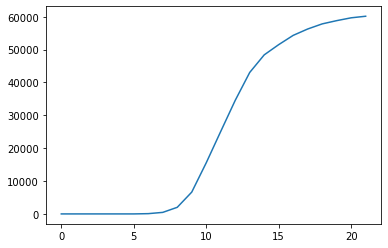

In [286]:
# Weekly
topten_weekly_results = []
for i in list(top_trends['Country/Region'].unique()):
    print(i)
    single_weekly_results = [] 
    for j in list(top_trends['Week_Number'].unique()):
        week_cases = top_trends[(top_trends['Week_Number']== j) & (top_trends['Country/Region']==i)]['Cases'].values
        if len(week_cases) == 0:
            single_weekly_results.append(0.0)
        else:
            single_weekly_results.append(np.mean(week_cases))
    topten_weekly_results.append(single_weekly_results)
    
plt.plot(topten_weekly_results[0])

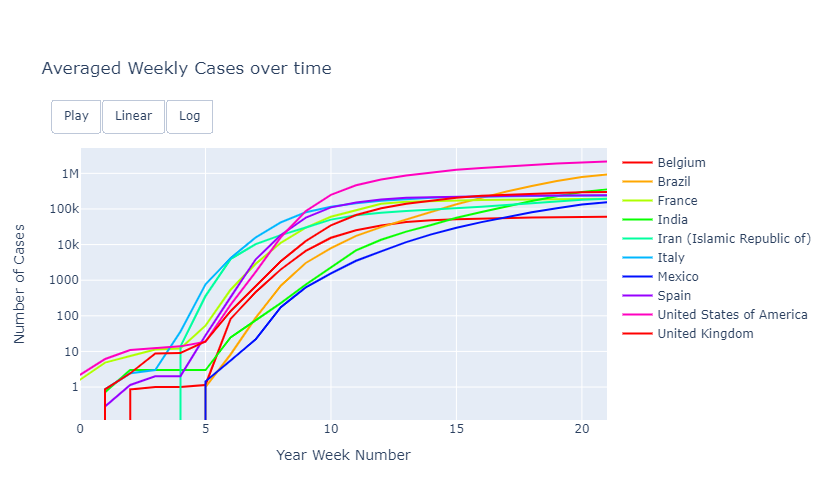

In [481]:
import plotly.graph_objects as go

colorscale = px.colors.cyclical.HSV

plot_data = []
for i, j in zip(range(len(topten_weekly_results)), list(top_trends['Country/Region'].unique())):
    plot_data.append(go.Scatter(x=[i for i in range(len(topten_weekly_results[i]))], 
                                y=topten_weekly_results[i],
                                mode="lines",
                                name=j,
                                line=dict(color=colorscale[i], width=2)))

# Create figure
fig = go.Figure(
    data=plot_data,
        layout=go.Layout(
        title_text="Averaged Weekly Cases over time", hovermode="closest",
        updatemenus= [
            {
                "buttons": [
                    {
                        "args": [None, {"frame": {"duration": 200, "redraw": False},
                                        "fromcurrent": True, 
                                        "transition": {"duration": 100,
                                                       "easing": "quadratic-in-out"}}],
                        "label": "Play",
                        "method": "animate"
                    },
                    dict(label="Linear",  
                          method="relayout", 
                          args=[{"yaxis.type": "linear"}]),
                     dict(label="Log", 
                          method="relayout", 
                          args=[{"yaxis.type": "log"}]),
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.27,
                "xanchor": "right",
                "y": 1.5,
                "yanchor": "top"
            }
        ]),
    
    frames=[go.Frame(
        data=[
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[0],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[1],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[2],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[3],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[4],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[5],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[6],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[7],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[8],
            mode="lines"),
                         go.Scatter(
            x=[i for i in range(k)], 
            y=topten_weekly_results[9],
            mode="lines")
        ]) for k in range(len(topten_weekly_results[9]))],
    
)

fig.update_layout(height=500, width=800, yaxis_type="log") 
fig.update_xaxes(title_text="Year Week Number")
fig.update_yaxes(title_text="Number of Cases")
fig.show()

In [469]:
df_log_plot = pd.DataFrame(topten_weekly_results,columns=list(top_trends['Week_Number'].unique()))
df_log_plot2 = df_log_plot.iloc[:, 1:]
df_log_plot2[str(df_log_plot2.columns[-1]+1)] = [0 for i in range(len(df_log_plot2))]
df_log_plot2.columns = df_log_plot.columns
df_log_plot = df_log_plot.iloc[:, :-1]
df_log_plot2 = df_log_plot2.iloc[:, :-1]
cases_change = df_log_plot2.sub(df_log_plot)
list_cases_change = cases_change.values.tolist()
list_weekly_cases = df_log_plot.values.tolist()

,4,5,6,7,8,9,10,11,12,13,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.857143,0.142857,0.000000,0.142857,80.571429,385.142857,1541.000000,4626.142857,8920.000000,...,9454.428571,8495.714286,5353.857143,3115.857143,2820.714286,1938.714286,1555.000000,989.000000,863.142857,476.190476
1,0.000000,0.000000,0.000000,0.000000,1.000000,7.285714,78.857143,609.142857,2344.714286,4919.285714,...,13345.285714,19950.142857,34657.000000,50490.285714,69125.571429,104918.000000,132030.857143,170932.571429,182563.571429,126692.285714
2,3.257143,2.571429,3.857143,0.714286,40.714286,492.142857,2356.285714,8235.428571,18879.285714,30239.714286,...,50194.000000,18151.428571,8849.428571,6554.857143,4648.142857,2909.285714,3944.000000,4534.000000,2396.857143,1840.523810
3,0.714286,2.285714,0.000000,0.000000,0.000000,21.571429,51.285714,150.000000,533.714286,1587.000000,...,6771.714286,9484.000000,12341.714286,20954.000000,26057.571429,36366.857143,47618.857143,60606.857143,71309.000000,56335.952381
4,0.000000,0.000000,0.000000,13.714286,343.285714,3558.428571,6414.428571,8073.000000,11644.571429,20140.142857,...,11619.285714,9170.714286,7505.571429,8577.857143,11517.142857,14531.857143,15071.428571,19369.142857,16773.857143,12061.047619
5,0.857143,1.571429,0.571429,32.571429,731.428571,3430.000000,11583.000000,26501.571429,38395.142857,34573.857143,...,25148.428571,20724.857143,15563.000000,10334.714286,7217.285714,5069.714286,3670.714286,2485.428571,1971.142857,1440.904762
6,0.000000,0.000000,0.000000,0.000000,1.428571,4.142857,16.428571,153.285714,451.857143,932.571429,...,2945.714286,5235.857143,7680.142857,10368.857143,12949.000000,17188.000000,21249.714286,24362.285714,28265.285714,21218.476190
7,0.285714,0.857143,0.857143,0.000000,26.142857,306.000000,3486.285714,14481.714286,39038.714286,53669.857143,...,31183.000000,22265.571429,7646.285714,7720.428571,7911.285714,4263.571429,3996.285714,3042.714286,2145.428571,1600.190476
8,3.942857,4.857143,1.428571,1.428571,4.857143,183.285714,1497.285714,14389.428571,71565.428571,160058.000000,...,206405.857143,204660.714286,201050.571429,185383.000000,162820.857143,159989.714286,149412.428571,147789.285714,145596.571429,112133.142857
9,0.857143,1.571429,6.285714,0.285714,10.000000,115.000000,539.571429,2711.428571,9212.000000,21913.571429,...,37005.571429,34837.142857,33069.857143,34052.428571,27706.285714,18959.714286,16654.142857,12695.857143,10187.000000,6481.857143


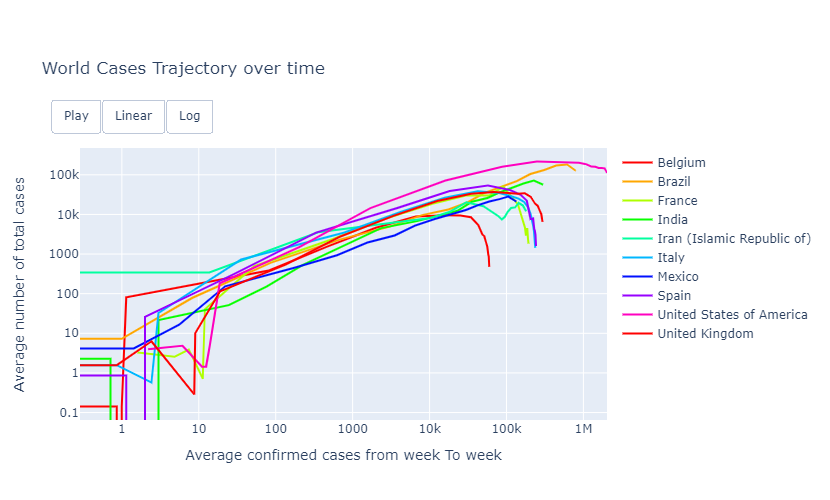

In [478]:
import plotly.graph_objects as go

colorscale = px.colors.cyclical.HSV

plot_data = []
for i, j in zip(range(len(list_weekly_cases)), list(top_trends['Country/Region'].unique())):
    plot_data.append(go.Scatter(x=list_weekly_cases[i], 
                                y=list_cases_change[i],
                                mode="lines",
                                name=j,
                                line=dict(color=colorscale[i], width=2)))

# Create figure
fig = go.Figure(
    data=plot_data,
        layout=go.Layout(
        title_text="World Cases Trajectory over time", hovermode="closest",
        updatemenus= [
            {
                "buttons": [
                    {
                        "args": [None, {"frame": {"duration": 200, "redraw": False},
                                        "fromcurrent": True, 
                                        "transition": {"duration": 100,
                                                       "easing": "quadratic-in-out"}}],
                        "label": "Play",
                        "method": "animate"
                    },
                    dict(label="Linear",  
                          method="relayout", 
                          args=[{"yaxis.type": "linear"}]),
                     dict(label="Log", 
                          method="relayout", 
                          args=[{"yaxis.type": "log"}]),
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.27,
                "xanchor": "right",
                "y": 1.5,
                "yanchor": "top"
            }
        ]),
    
    frames=[go.Frame(
        data=[
                         go.Scatter(
            x=[i for i in list_weekly_cases[0][:k]], 
            y=list_cases_change[0],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[1][:k]], 
            y=list_cases_change[1],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[2][:k]], 
            y=list_cases_change[2],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[3][:k]], 
            y=list_cases_change[3],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[4][:k]], 
            y=list_cases_change[4],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[5][:k]], 
            y=list_cases_change[5],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[6][:k]], 
            y=list_cases_change[6],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[7][:k]], 
            y=list_cases_change[7],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[8][:k]], 
            y=list_cases_change[8],
            mode="lines"),
                         go.Scatter(
            x=[i for i in list_weekly_cases[9][:k]], 
            y=list_cases_change[9],
            mode="lines")
        ]) for k in range(len(list_cases_change[9]))],
    
)

fig.update_layout(height=500, width=800, yaxis_type="log", xaxis_type="log") 
fig.update_xaxes(title_text="Average confirmed cases from week To week")
fig.update_yaxes(title_text="Average number of total cases")
fig.show()

## Extra

In [262]:
# Daily dataframe style
avg_week_cases, countries, week_numbers = [], [], []
for j in list(top_trends['Week_Number'].unique()):
    for i in list(top_trends['Country/Region'].unique()):
        week_cases = top_trends[(top_trends['Week_Number']== j) & (top_trends['Country/Region']==i)]['Cases'].values
        if len(week_cases) == 0:
            avg_week_cases.append(0.0)
        else:
            avg_week_cases.append(np.mean(week_cases))
        countries.append(i)
        week_numbers.append(j)

In [220]:
# Weekly dataframe style
avg_week_cases, countries, week_numbers = [], [], []
for j in list(top_trends['Dates'].unique()):
    for i in list(top_trends['Country/Region'].unique()):
        week_cases = top_trends[(top_trends['Dates']== j) & (top_trends['Country/Region']==i)]['Cases'].values
        if len(week_cases) == 0:
            avg_week_cases.append(0.0)
        else:
            avg_week_cases.append(np.mean(week_cases))
        countries.append(i)
        week_numbers.append(j)

In [221]:
d = {'Cuntry': countries, 'Avg_Cases': avg_week_cases, 'Year Week':week_numbers}
df_log_plot = pd.DataFrame(data=d)

df_log_plot

,Cuntry,Avg_Cases,Year Week
0,Belgium,0.0,2020-01-22
1,Brazil,0.0,2020-01-22
2,France,0.0,2020-01-22
3,India,0.0,2020-01-22
4,Iran (Islamic Republic of),0.0,2020-01-22
...,...,...,...
1475,Italy,237828.0,2020-06-17
1476,Mexico,159793.0,2020-06-17
1477,Spain,244683.0,2020-06-17
1478,United States of America,2163290.0,2020-06-17


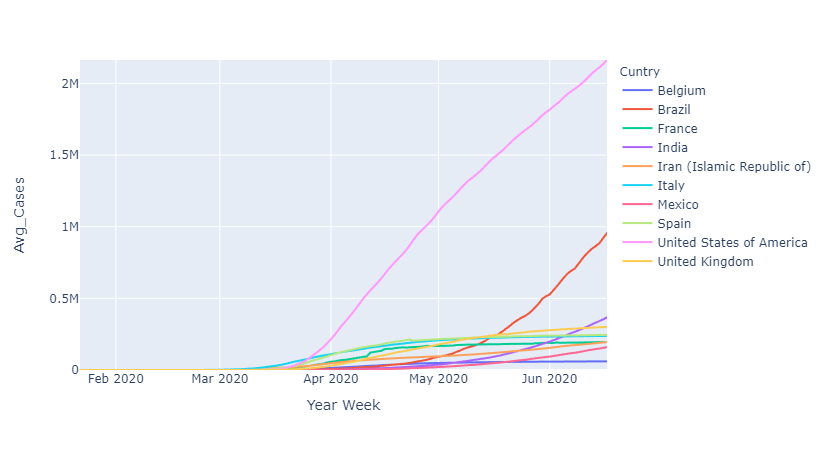

In [223]:
fig = px.line(df_log_plot, x='Year Week', y="Avg_Cases", color="Cuntry", 
                # animation_frame='Year Week',
                 range_y=[0,max(df_log_plot['Avg_Cases'])], range_x=[min(df_log_plot['Year Week']),
                                                                     max(df_log_plot['Year Week'])])
fig